# Project 02
    - functions, plotting, loops

In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function
A stock simulation will be created using a function which accepts a start price, rate, volatility and time period as well as a normal random enerator using these parameters.  Numpy functions are used in this exercise.

In [2]:
def simulate_stock (start, rate, vol, days):
    daily_yields = np.array(np.random.normal(rate/252, vol/(252**0.5), days))
    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    simulated_runs = np.round(start * daily_multipliers, 2)
    simulated_runs = np.concatenate(([start], simulated_runs))  # double required to concatenate scalar and array by creating a tuple
    return simulated_runs

Function is demonstrated using a line graph.

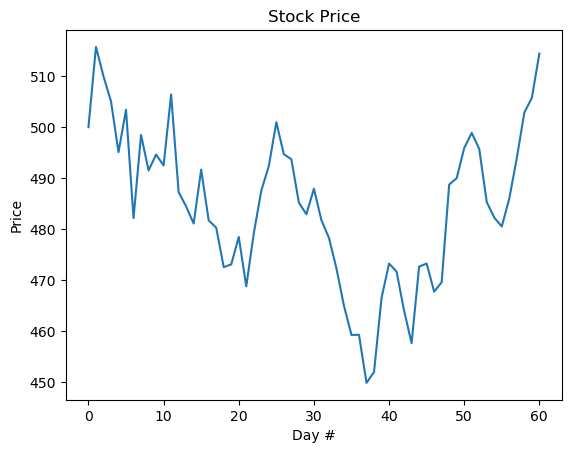

In [3]:
np.random.seed(1)   
sixty_days = simulate_stock(500, 0.08, 0.3, 60)

plt.plot(sixty_days)
plt.xlabel('Day #')
plt.ylabel('Price')
plt.title('Stock Price')
plt.show()

## Part B: Annual Yield Function
A function is created to take a parameter (an array) of daily prices for a stock.  The function will calculate the annual yield for a given time period (the run which is the length of the parameter array.)

In [4]:
def find_yield(run):
    annual_yield = round((mt.log(run[-1] / run[0]) * 252 / (len(run)-1)), 4)
    return annual_yield

The 'find_yield' function will be tested on the output obtained in Part A from the 'simulate_stock' function.

In [5]:
# print(sixty_days)
find_yield(sixty_days)

0.1196

25 simulations using 'simulate_stock' will be plotted to test the variability of the resulting prices.

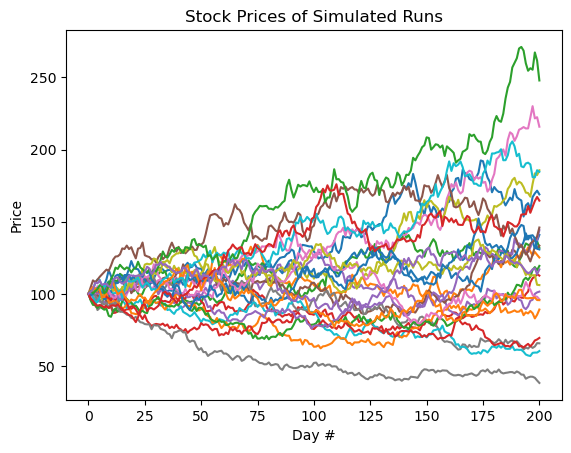

In [6]:
fig, axs = plt.subplots(1, 1)
combined_runs = []

for i in range(25):
    runs = simulate_stock(100, 0.06, 0.4, 200)
    annual_yield = np.round(find_yield(runs), 4)
    combined_runs.append(annual_yield)
    plt.plot(runs)
plt.xlabel('Day #')
plt.ylabel('Price')
plt.title('Stock Prices of Simulated Runs')
plt.show()
    

The annual yields of the preceeding 25 simulations are displayed below.

In [7]:
print(combined_runs)

[0.6611, 0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978]


## Part C: Finding Seeds that Generate Specific Outcomes
Different seeds will be tested to determine their effects on the outcomes of the final prices of 3 stocks.

In the cell below, Stock A has the highest simulated final price.

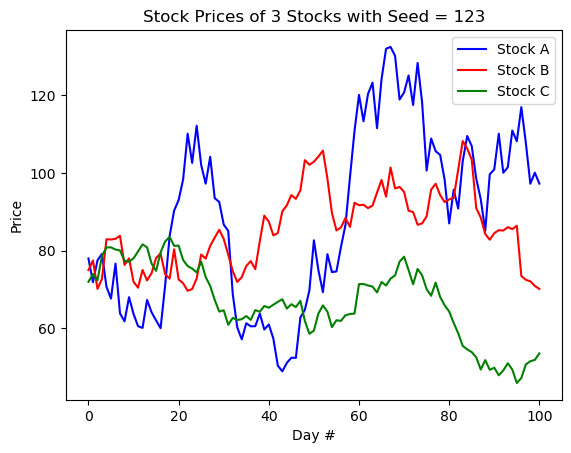

In [8]:
stocks = ['Stock A', 'Stock B', 'Stock C']
prices = [78, 75, 72]
returns = [0.04, 0.08, 0.16]
volatilities = [1.2, 0.8, 0.6]
colors = ['blue', 'red', 'green']

fig, axs = plt.subplots(1, 1)
combined_runs = []
np.random.seed(123)
for i in range(len(stocks)):
    runs = simulate_stock(prices[i], returns[i], volatilities[i], 100)
    annual_yield = np.round(find_yield(runs), 4)
    combined_runs.append(annual_yield)
    plt.plot(runs, color = colors[i])
plt.legend(stocks)
plt.xlabel('Day #')
plt.ylabel('Price')
plt.title('Stock Prices of 3 Stocks with Seed = 123')
plt.show()    

In the cell below, Stock B has the highest simulated final price.

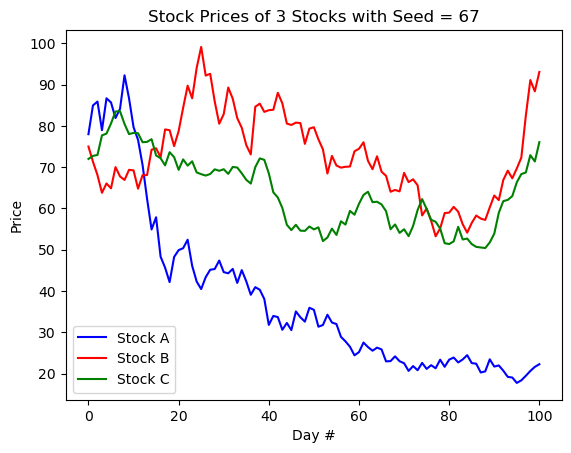

In [9]:
fig, axs = plt.subplots(1, 1)
combined_runs = []
np.random.seed(67)
for i in range(len(stocks)):
    runs = simulate_stock(prices[i], returns[i], volatilities[i], 100)
    annual_yield = np.round(find_yield(runs), 4)
    combined_runs.append(annual_yield)
    plt.plot(runs, color = colors[i])
plt.legend(stocks)
plt.xlabel('Day #')
plt.ylabel('Price')
plt.title('Stock Prices of 3 Stocks with Seed = 67')
plt.show()    

In the cell below, Stock C has the highest simulated final price.

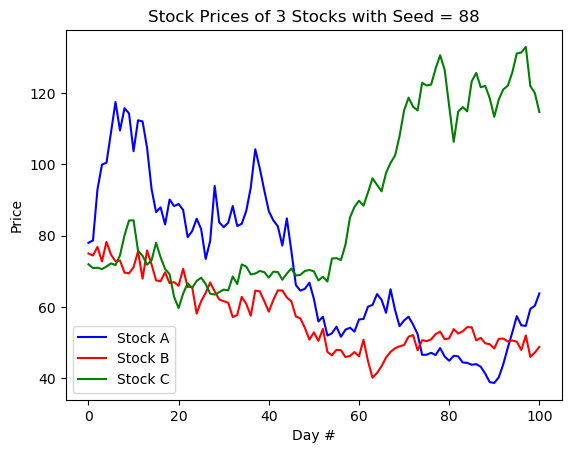

In [10]:
fig, axs = plt.subplots(1, 1)
combined_runs = []
np.random.seed(88)
for i in range(len(stocks)):
    runs = simulate_stock(prices[i], returns[i], volatilities[i], 100)
    annual_yield = np.round(find_yield(runs), 4)
    combined_runs.append(annual_yield)
    plt.plot(runs, color = colors[i])
plt.legend(stocks)
plt.xlabel('Day #')
plt.ylabel('Price')
plt.title('Stock Prices of 3 Stocks with Seed = 88')
plt.show()    

## Part D: Monte Carlo Simulation
A Monte Carlo simulation with 10,000 runs will be performed to analyze the distribution of the varying, pseudorandom results. 

In [11]:
def monte_carlo(start, rate, vol, days, num_runs): 
    global final_prices     # create global lists for returning outside function
    global annual_yields     # create global lists for returning outside function
    final_prices = []
    annual_yields =[]

    i = 0
    for runs in range(0, num_runs):
        daily_yields = np.random.normal(rate/252, vol/(252**0.5), days)
        cumulative_yields = np.cumsum(daily_yields)
        daily_multipliers = np.exp(cumulative_yields)
        runs = np.round(start * daily_multipliers, 2)
        final_prices.append(runs[-1])

        annual_yield = mt.log(final_prices[i] / start) * 252.0 / days
        annual_yields.append(annual_yield)
        i += 1
        
    final_prices = np.array(final_prices)
    annual_yields = np.array(annual_yields)
    return final_prices, annual_yields

The Monte Carlo function will be tested with a seed = 1 and given parameters and a histogram demonstrating the distribution will be displayed.

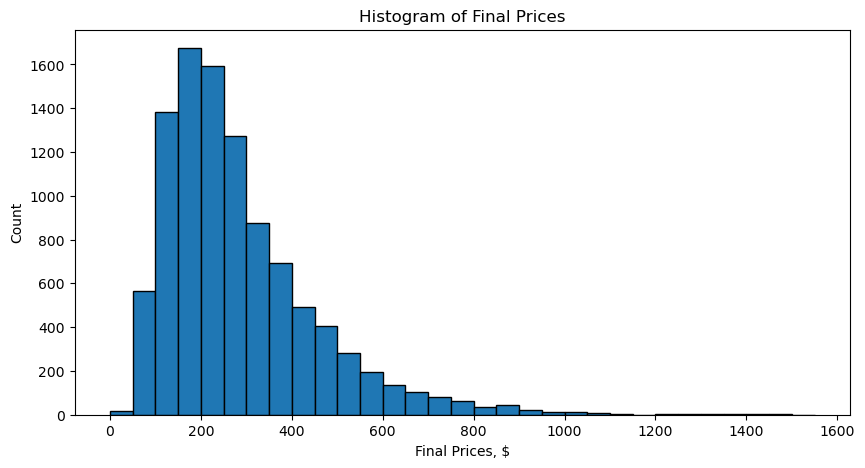

In [12]:
np.random.seed(1)
monte_carlo(200, 0.1, 0.4, 500, 10000)

plt.figure(figsize = [10, 5])
plt.hist(final_prices, bins = np.arange(0, 1600, 50), edgecolor = 'black')
plt.xlabel('Final Prices, $')
plt.ylabel('Count')
plt.title('Histogram of Final Prices')
plt.show()

The 10th, 25th, 50th, 75th and 90th percentiles of the simulated final prices are displayed below.

In [13]:
print(f'10th percentile: {np.round(np.percentile(final_prices, 10), 2)}\n25th percentile: {np.round(np.percentile(final_prices, 25), 2)}\n50th percentile: {np.round(np.percentile(final_prices, 50), 2)}\n75th percentile: {np.round(np.percentile(final_prices, 75), 2)}\n90th percentile: {np.round(np.percentile(final_prices, 90), 2)}')

10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility
Here we use two Monte Carlo simulations to study the effect of volatility on simulated stock prices. All other parameters will be constant.

In [14]:
np.random.seed(1)
start = 100
rate = 0.12
days = 150
num_runs = 10000

# Stock A
vol_A = 0.3
monte_carlo(start, rate, vol_A, days, num_runs)
a = np.mean(annual_yields)
global a1
a1 = final_prices

# Stock B
vol_B = 0.7                                           
monte_carlo(start, rate, vol_B, days, num_runs)
b = np.mean(annual_yields)
global b1
b1 = final_prices

print(f'Average Annual Yield for A over 10000 runs: {np.round(a, 4)}\nAverage Annual Yield for B over 10000 runs: {np.round(b, 4)}')

Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for B over 10000 runs: 0.1128


Here we plot histograms of the above Monte Carlo simulations for visual inspection.

<Figure size 1000x500 with 0 Axes>

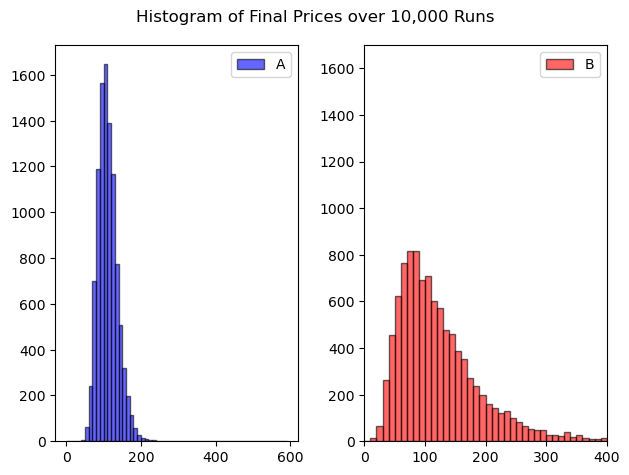

In [15]:
fig = plt.figure(figsize = (10, 5))
fig, (ax1, ax2) = plt.subplots(1, 2)                                      
fig.suptitle('Histogram of Final Prices over 10,000 Runs', fontsize = 12)
plt.ylim((0,1700))  # y-axes weren't equal - need to be equivalent for comparison
plt.xlim((0,400))  # I cut off tails purposely to zoom into the peak areas

ax1.hist(a1, color = 'blue', edgecolor = 'black', alpha = 0.6, bins = np.arange(0, 600, 10), label = 'A')
ax2.hist(b1, color = 'red', edgecolor = 'black', alpha = 0.6, bins = np.arange(0, 600, 10), label = 'B')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
plt.tight_layout() 
plt.show()

## Part F: Comparing Two Stocks
Here we use Monte Carlo simulations to study the paired effects of rate & volatility on simulated stock prices with constant initial values and runs.

In [16]:
np.random.seed(1)
start = 120
days = 252
num_runs = 10000

# function on A
rate_A2 = 0.08
vol_A2 = 0.2
monte_carlo(start, rate_A2, vol_A2, days, num_runs)
a2 = final_prices 

# function on B
rate_B2 = 0.05
vol_B2 = 0.5
monte_carlo(start, rate_B2, vol_B2, days, num_runs)
b2 = final_prices

# find all proportions
P_A_greater_B = a2 > b2
PAB = np.round(np.count_nonzero(P_A_greater_B)/10000, 4)
P_A_greater_150 = a2 > 150
PA150 = np.round(np.count_nonzero(P_A_greater_150)/10000, 4)
P_B_greater_150 = b2 > 150
PB150 = np.round(np.count_nonzero(P_B_greater_150)/10000, 4)
P_A_less_100 = a2 < 100
PA100 = np.round(np.count_nonzero(P_A_less_100)/10000, 4)
P_B_less_100 = b2 < 100
PB100 = np.round((np.count_nonzero(P_B_less_100)/10000), 4)

print(f'{"Proportions of runs in which..."}{chr(10)}{"-" * 31}{chr(10)}\
{"A ends above B:   "}{PAB:0.4f}{chr(10)}{chr(10)}{"A ends above 150: "}{PA150:0.4f}{chr(10)}\
{"B ends above 150: "}{PB150:0.4f}{chr(10)}{chr(10)}\
{"A ends below 100: "}{PA100:0.4f}{chr(10)}{"B ends below 100: "}{PB100:0.4f}')

Proportions of runs in which...
-------------------------------
A ends above B:   0.5206

A ends above 150: 0.2338
B ends above 150: 0.3619

A ends below 100: 0.0950
B ends below 100: 0.3195


## Part G: Expected Call Payoff
Here we use a Monte Carlo to predict the average payoff of a call option given certain parameters.

In [17]:
np.random.seed(1)
start = 200
rate = 0.11
vol = 0.4
days = 150
num_runs = 10000

f = (monte_carlo(start, rate, vol, days, num_runs)[0]) - 225   
f = np.where(f < 0, 0, f)
print(f'{"The average call payoff over the 10,000 runs is $"}{np.mean(f):.2f}{"."}')

The average call payoff over the 10,000 runs is $27.10.
